# *Group 39*: **Project Final Report**

By: Selina Jia, Behnam Kheirabadi, Rowan Flores, and Sirui Chen

In [1]:
# Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Introduction:

Understanding the factors that influence how much time the player spends in a game is an important part of game design and player behavior research. Play time is often regarded as a measure of player engagement, learning progression, and overall satisfaction with the game. For Minecraft players, their characteristics, such as ages and previous gaming experience, will significantly shape how long individuals play and how quickly they learn game mechanics.

In this project, we try to answer the following research question:
**Can a player's age and experience level be used to predict their total play time (played_hours)?**
By analyzing the relationship between these variables, we hope to better understand which types of players tend to play for longer periods and whether experience level becomes a reliable indicator of engagement.

To investigate this question, we used the players.csv dataset, which contains information on 196 observations and seven variables: experience, subscribe, hashedEmail, name, gender, played_hours, and Age. Since all variables needed for this analysis are available in the players dataset and our question does not need the specific time stamps for the start and end time of each session for each player, we don't need to use the sessions dataset.
For our analysis, we chose the key variables: experience, Age, and played_hours. The experience column contains five categories (Beginner, Regular, Amateur, Veteran, Pro), which we transfer into ordered "dummy numerical values" to support statistical modeling. In the data-cleaning process, we identified and removed the missing values to ensure accurate analysis.
## Variables in players.csv

| Variable Name | Type        | Description |
|---------------|-------------|-------------|
| **experience** | Categorical (chr) | The player's experience level in the game (Beginner, Regular, Amateur, Veteran, Pro). |
| **subscribe**  | Logical (lgl)    | Whether the player subscribed to the Minecraft-related newsletter (TRUE or FALSE). |
| **hashedEmail**| Feature (chr)    | A unique hashed identifier for each player. |
| **played_hours** | Numeric (dbl) | Total hours the player has spent playing the game. |
| **name**        | Feature (chr)   | The name of the player. |
| **gender**      | Feature (chr)   | The player’s reported gender (female, male, non-binary, prefer not to say, agender, two-spirited). |
| **Age**         | Numeric (dbl)   | The player’s age. |


Based on our work with the cleaned dataset and exploring patterns, ages, and total play time, we have laid the groundwork for subsequent use of methods such as K-Nearest Neighbor (KNN) regression to evaluate whether these features can effectively predict game duration.

In [2]:
players_url <- "https://raw.githubusercontent.com/iSqlqmi/dsci_100_group_project/refs/heads/main/data/players.csv"

players <- read_csv(players_url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


# Methods and Results: *Wrangling and Exploratory*

**Proposed Method**: Using KNN regression to predict the played_hours for each player given the data from the experience and age columns

**Explanation**: KNN regression is appropriate because the variables show a weak linear relationship to eachother and this method makes minimal assumptions about the data shape. Moreover, I chose to use the model regression because the value I am predicting (played_hours) is not a categorical variable (it is numerical) so we can't use classification since classification predicts on a categorical variable. 

First, we need to wrangle our data. Since `experience`, `played_hours`, and `Age`, are the only required columns for the analysis, we begin by selecting the required columns and ignoring the rest of the columns.

In [3]:
players_select <- players |> select(experience,played_hours,Age)
players_select

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Amateur,0.0,57
Amateur,2.3,17
Pro,0.2,NA


The next step of wrangling, involves converting the experience column from a categorical/character column into a numerical column since knn regression requires all predictors to be numerical. This begins by first identifying all the unique experience levels in `experience` column and ensure that there no **NA** rows.

In [4]:
unique(players_select$experience)
any(is.na(players_select$experience))

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] FALSE

There are 5 experience levels in `experience` column and all rows contain an experience level: Pro, Veteran, Amateur, Regular and Beginner. A few searches in gaming forums show the order of these ranks: Beginner < Regular < Amateur < Veteran < Pro  
We can use this information and encoding/assigning a unique numerical value for each rank.  
`Beginner` = 1  
`Regular`  = 2  
`Amateur`  = 3  
`Veteran`  = 4  
`Pro`      = 5

We will call the new numerical experience column `experience_num` and the new wrangled dataset `players_mutate`.

In [22]:
players_mutate <- players_select |>
            mutate(experience_num = case_when(
                experience == "Beginner" ~ 1,
                experience == "Regular" ~ 2,
                experience == "Amateur" ~ 3,
                experience == "Veteran" ~ 4,
                experience == "Pro" ~ 5))
players_mutate

experience,played_hours,Age,experience_num
<chr>,<dbl>,<dbl>,<dbl>
Pro,30.3,9,5
Veteran,3.8,17,4
Veteran,0.0,17,4
⋮,⋮,⋮,⋮
Amateur,0.0,57,3
Amateur,2.3,17,3
Pro,0.2,NA,5


With all the experience levels converted into numerical values and added to a new column, our original `experience` column can be dropped from our dataframe `players_mutate`.

In [6]:
players_mutate <- players_mutate |> select(-experience)
players_mutate

played_hours,Age,experience_num
<dbl>,<dbl>,<dbl>
30.3,9,5
3.8,17,4
0.0,17,4
⋮,⋮,⋮
0.0,57,3
2.3,17,3
0.2,NA,5


After successfully wrangling the data, we can perform a summary of all the relevant columns that are relevant to our data analysis and add the mean values to a dataframe. We will call this dataframe `players_mean_table`.

In [7]:
summary(players_mutate)

players_mean_table <- players_mutate |> summarize(play_hours_mean = round(mean(played_hours), 2), 
                                                  age_mean = round(mean(Age,na.rm= TRUE), 2), 
                                                  experience_mean = round(mean(experience_num),2))
players_mean_table

  played_hours          Age        experience_num 
 Min.   :  0.000   Min.   : 9.00   Min.   :1.000  
 1st Qu.:  0.000   1st Qu.:17.00   1st Qu.:2.000  
 Median :  0.100   Median :19.00   Median :3.000  
 Mean   :  5.846   Mean   :21.14   Mean   :2.847  
 3rd Qu.:  0.600   3rd Qu.:22.75   3rd Qu.:4.000  
 Max.   :223.100   Max.   :58.00   Max.   :5.000  
                   NA's   :2                      

play_hours_mean,age_mean,experience_mean
<dbl>,<dbl>,<dbl>
5.85,21.14,2.85


Next we proceed by analyzing the relationship between the predictors `experience`, `Age`, and response variable `played_hours`.

We begin by looking at the relationship between `played_hours` and `Age`. (For this example, we use the `players` dataframe since our experience column is categorical/character type making it easier to differentiate between each experience rank). We will call this `hours_experience_plot`.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


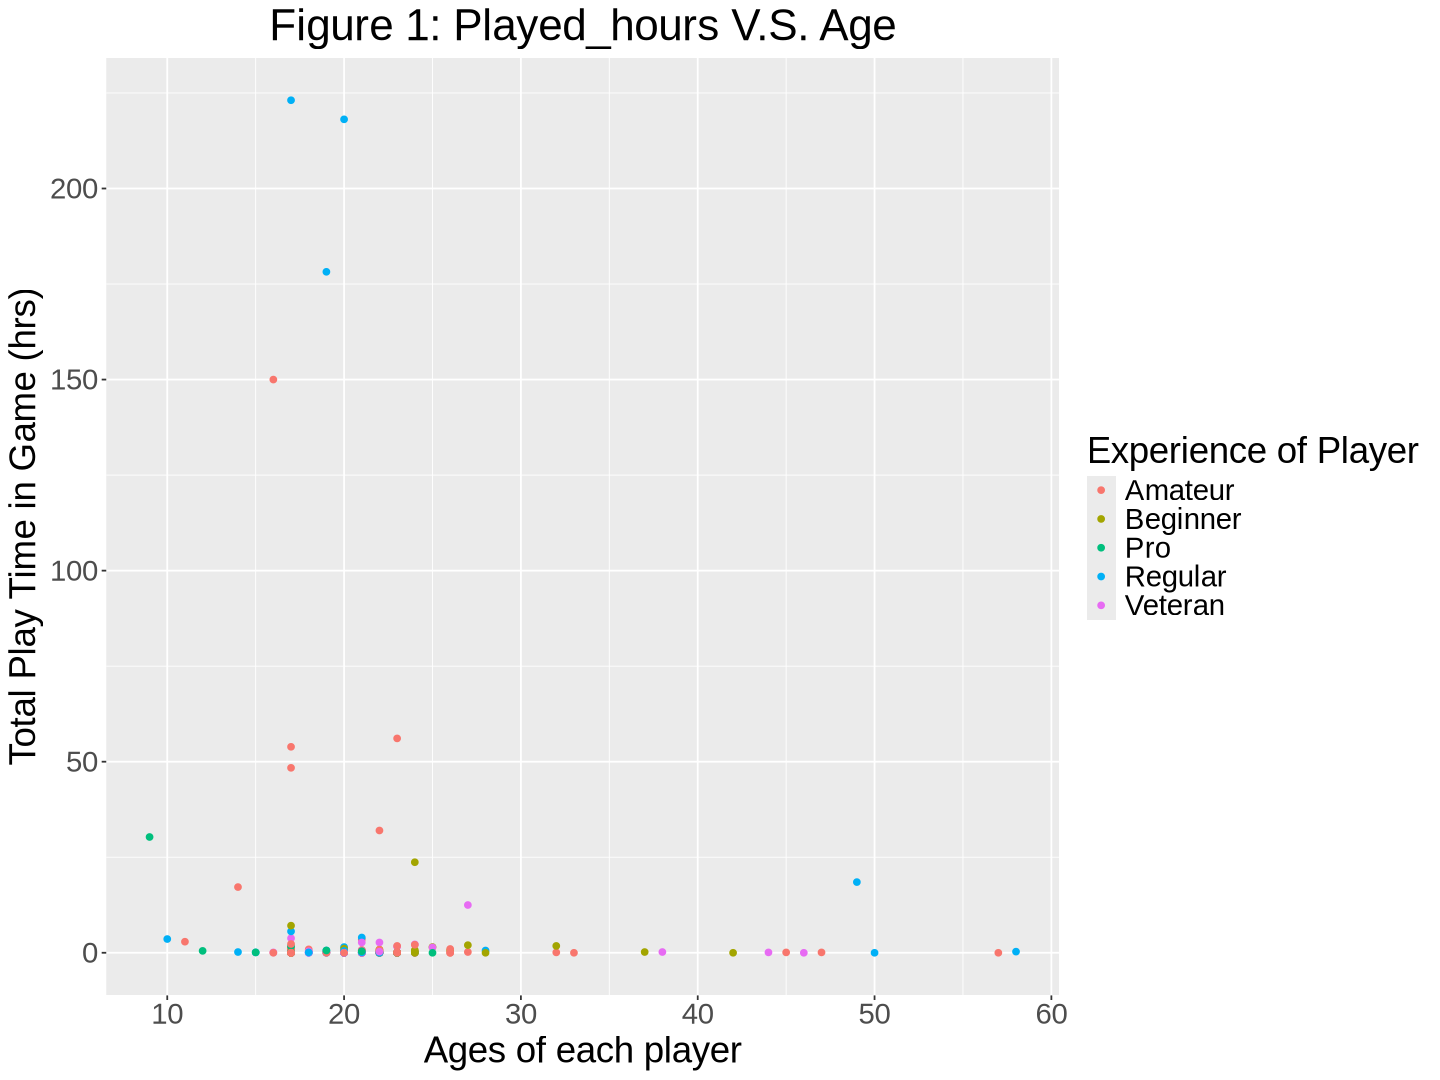

In [8]:
options(repr.plot.width = 12, repr.plot.height = 9)
hours_experience_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(
        x = "Ages of each player",
        y = "Total Play Time in Game (hrs)",
        color = "Experience of Player",
        title = "Figure 1: Played_hours V.S. Age") +
    theme(text = element_text(size = 22),
         plot.title = element_text(hjust = 0.5))
hours_experience_plot

Next we look at the average played hours between each experience rank. This involves by grouping all the `experience` rows together and finding the average played_hours between them, we will call this dataframe `avg_played_hours` and the plot will be called `avg_hours_exp_plot`. 

experience,avg_played_hours
<fct>,<dbl>
Veteran,0.6479167
Beginner,1.2485714
Pro,2.6000000
Amateur,6.0174603
Regular,18.2083333


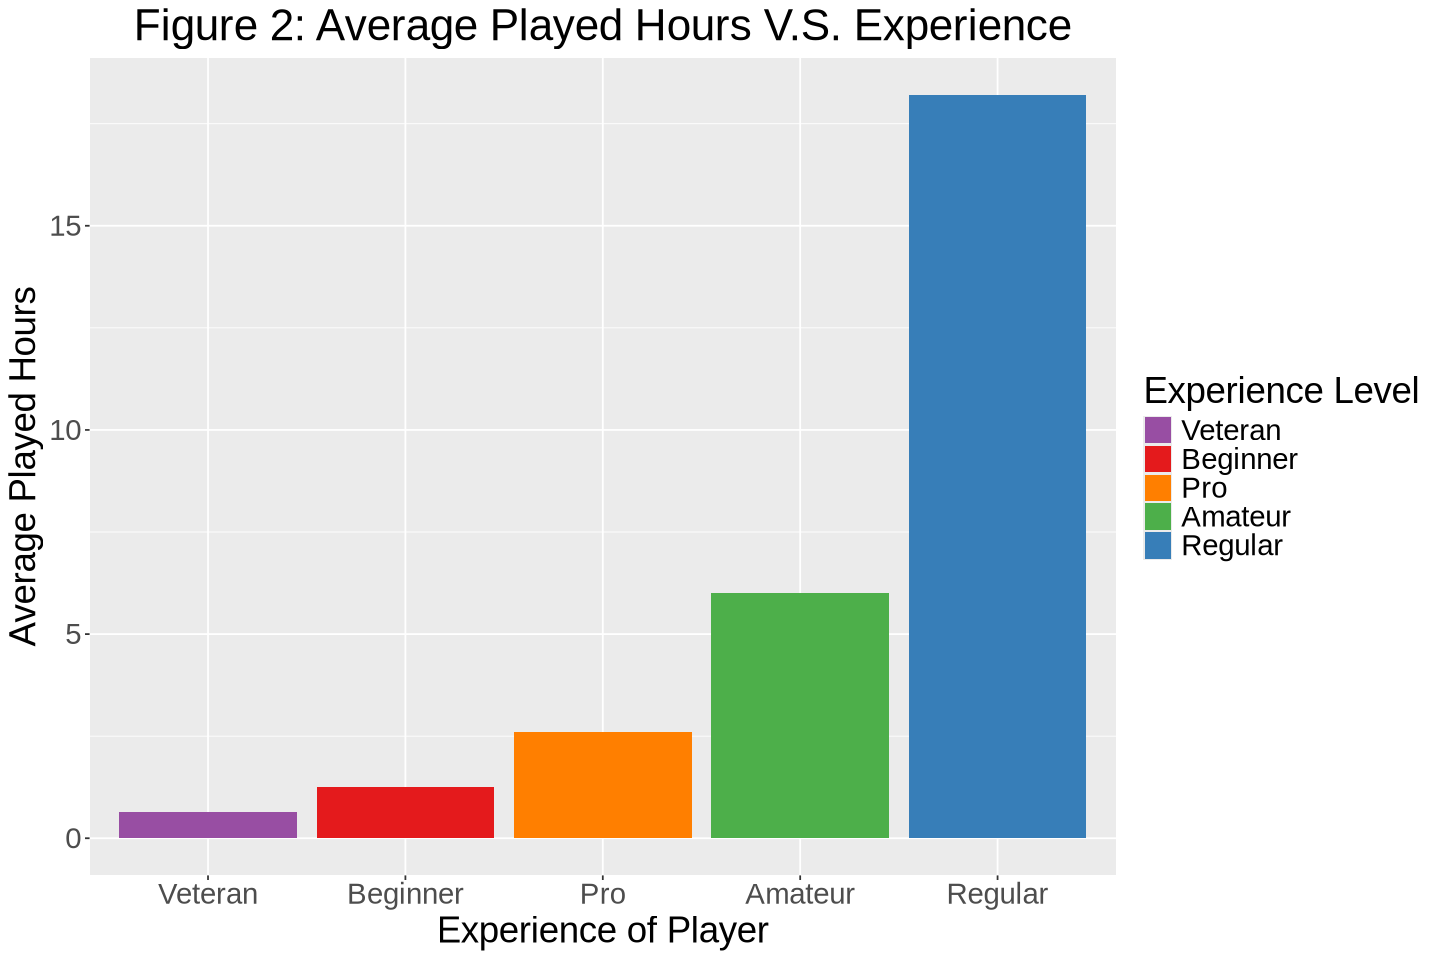

In [9]:
avg_played_hours <- players_mutate |> select(experience_num, played_hours) |> group_by(experience_num) |>
                    summarize(avg_played_hours = mean(played_hours)) |>
                    mutate(experience = case_when(
                experience_num == 1 ~ "Beginner",
                experience_num == 2 ~ "Regular",
                experience_num == 3 ~ "Amateur",
                experience_num == 4 ~ "Veteran",
                experience_num == 5 ~ "Pro")) |>
                relocate(experience) |> select(-experience_num) |> arrange(avg_played_hours) |>
                mutate(experience = fct_inorder(experience)) #Function used to allow R to plot from top to bottom (sorted)
                                                             #instead of alphabetic order
avg_played_hours

# added specific color coding to keep the color of the bars consistent
bar_colors <- c(
  "Beginner" = "#E41A1C",   # red
  "Regular"  = "#377EB8",   # blue
  "Amateur"  = "#4DAF4A",   # green
  "Veteran"  = "#984EA3",   # purple
  "Pro"      = "#FF7F00")    # orange

options(repr.plot.width = 12, repr.plot.height = 8)
avg_hours_exp_plot <- avg_played_hours |>
                        ggplot(aes(x = experience, y = avg_played_hours, fill = experience))+
                        geom_bar(stat = "identity") +
                        labs(
                            x = "Experience of Player",
                            y = "Average Played Hours",
                            fill = "Experience Level",
                            title = "Figure 2: Average Played Hours V.S. Experience") +
                            scale_fill_manual(values = bar_colors) +
                            theme(text = element_text(size = 22),
                            plot.title = element_text(hjust = 0.5))
avg_hours_exp_plot

**Insights from Figures 1 and 2:** 

From figure 1, people in the ages 15-25 have more play time then the other groups which could mean that they have more time/bigger interest playing games than the other age groups. 

From figure 2, people in the regular experience group had the highest average play time followed by the amateur experience group which could be because it can take newer players more time to get used to the game mechanics and regular players are more casual with their play style compared to veteran players who already know how to play really well and know all of the mechanics. One disadvantage/limitation in the bar graph could be that Veteran, Beginner and Pro players are underrepresented (more people in the regular and amateur experience groups) which may impact the overall predictions.

# Methods and Results: *Data Analysis*

For our data analysis we will be using KNN regression to predict the `played_hours` for each player given the data from the experience and age columns from the `players` dataset.

To perform the prediction we will first split the dataset (players_mutate since this dataset has the experience column converted into numerical values) into 75% training and 25% testing sets named `players_split`, `players_train`, and `players_test` respectively. Also, we will use set.seed(1) to make sure all of our code/results are reproducible.

In [10]:
set.seed(1)

players_mutate_2 <- players_mutate |>
    drop_na() #remove NA values from data

players_split <- initial_split(players_mutate_2, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

players_mutate_2

played_hours,Age,experience_num
<dbl>,<dbl>,<dbl>
30.3,9,5
3.8,17,4
0.0,17,4
⋮,⋮,⋮
0.3,22,4
0.0,57,3
2.3,17,3


Now we will use R to perform cross-validation and to choose the optimal K. First, we will create a recipe for preprocessing our data and include standardization for our two explanatory variables `age` and `experience` calling it `players_recipe`. 

Next we create a model specification for K-nearest neighbors regression remembering to do `neighbors = tune()` and using "regression" in the `set_mode` function calling it `players_spec`. Then we create a 5-fold cross-validation object calling it `players_vfold`, and put the recipe and model specification together in a workflow called `players_wkflow`.

In [11]:
players_recipe <- recipe(played_hours ~., data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_wkflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)
players_wkflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Next we run cross-validation for a grid of numbers of neighbors ranging from 1 to 30, call this `grid_vals`. The following code tunes the model and returns the RMSPE for each number of neighbors. In the output of the `players_results` data frame, we see that the neighbors variable contains the value of K, the mean contains the value of the RMSPE estimated via cross-validation, and the standard error (std_err) contains a value corresponding to a measure of how uncertain we are in the mean value.

In [12]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results <- players_wkflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,32.86603,5,7.893326,Preprocessor1_Model01
2,rmse,standard,35.50055,5,4.991465,Preprocessor1_Model02
3,rmse,standard,35.36425,5,5.402963,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,rmse,standard,30.00154,5,6.502720,Preprocessor1_Model28
29,rmse,standard,29.88523,5,6.544938,Preprocessor1_Model29
30,rmse,standard,29.94073,5,6.578529,Preprocessor1_Model30


Lets see a visualization of the K values indictated by the range of 1 to 30 below, call this `k_values_plot`.

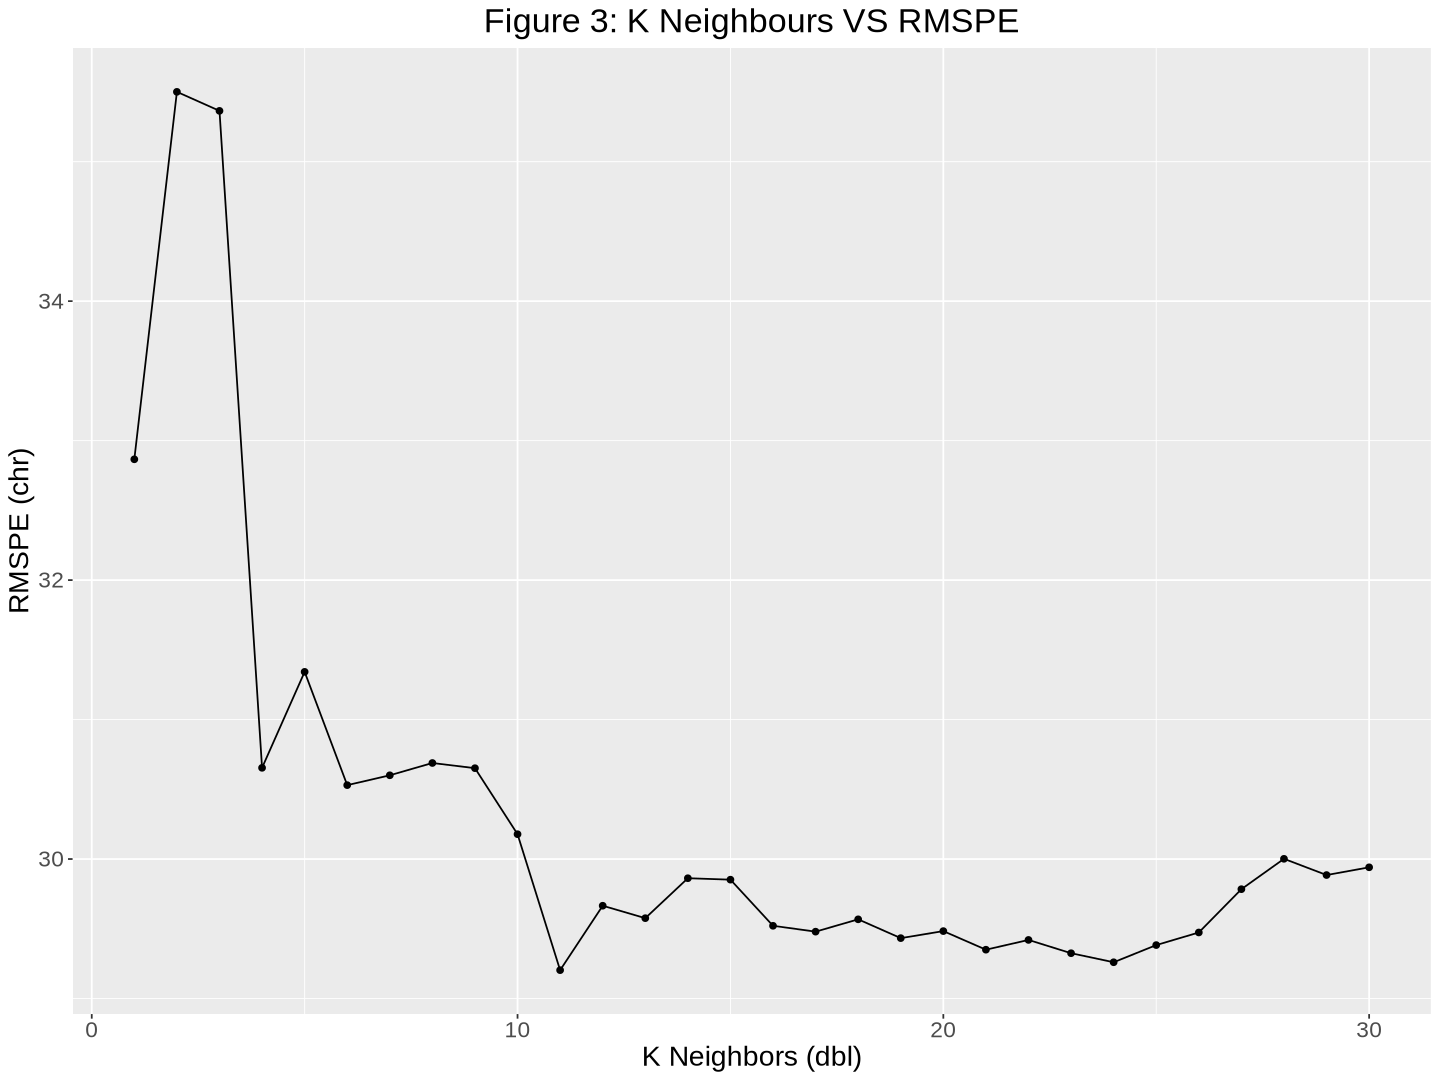

In [23]:
options(repr.plot.width = 12, repr.plot.height = 9)
k_values_plot <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(
        x = "K Neighbors (dbl)",
        y = "RMSPE (chr)",
        title = "Figure 3: K Neighbours VS RMSPE") +
    theme(text = element_text(size = 17),
         plot.title = element_text(hjust = 0.5))
k_values_plot

We can clearly see a dip between 10 to 15 so we find the minimum of the means below to find our best K value, call this `best_k`.

In [14]:
best_k <- players_results |>
    filter(mean == min(mean)) |>
    pull(neighbors)

# show the results
best_k

[1] 11

Let’s continue the analysis to see how we can make predictions with a multivariable K-NN regression model and evaluate its performance on test data. We first need to re-train the model on the entire training data set with K = 11, and then use that model to make predictions on the test data. We will use `players_spec_2` for our new model specification, `players_fit` for our new workflow, `players_preds` to bind the predictions to the `players_test` dataframe, and `players_summary` to show our estimate of our prediction specifically the "rmse" metric.

In [17]:
players_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec_2) |>
  fit(data = players_train)

players_preds <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test)

players_summary <- metrics(players_preds, truth = played_hours, estimate = .pred) |>
                   filter(.metric == 'rmse')

#players_preds
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,16.46559


Lastly, lets create some visualizations with our predicted values. First to demonstrate the relationship between played_hours and the predicted values for played_hours we decided to represent our data with a qqplot like design showing the y = x line (normal distribution) and seeing if the points are either being underfitted or overfitted depending on how close to the line they are. We will call the plot `played_h_plot`.

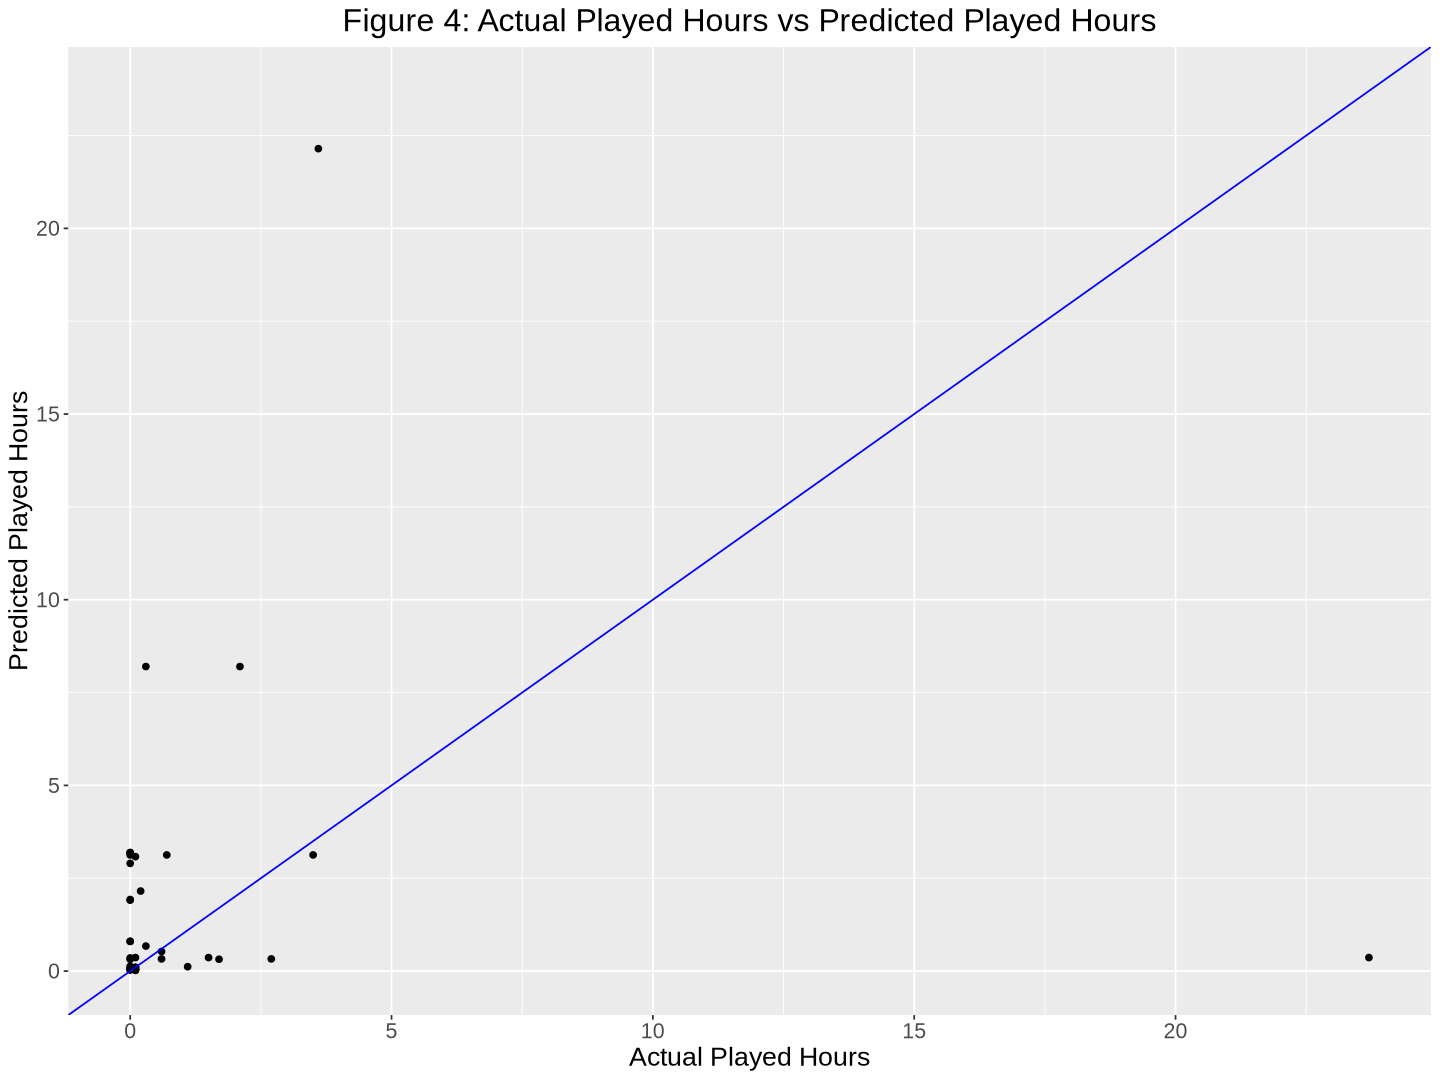

In [21]:
options(repr.plot.width = 12, repr.plot.height = 9)

max_val <- max(players_preds$played_hours, na.rm = TRUE) #used to set the y = x line properly in the graph

played_h_plot <- ggplot(players_preds, aes(x = played_hours, y = .pred)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "blue") +
  coord_cartesian(xlim = c(0, max_val), ylim = c(0, max_val)) +
  labs(
      x = "Actual Played Hours",
      y = "Predicted Played Hours",
      title = "Figure 4: Actual Played Hours vs Predicted Played Hours") +
  theme(text = element_text(size = 16),
  plot.title = element_text(hjust = 0.5))
played_h_plot

Now to see specifically the relationship with age and played hours we decided to use the same qqplot approach with played hours and the predicted values of played_hours by filtering for the age. We are going with this approach since it is hard to represent age and played_hours in a scatter plot since there are a number of points that overlap eachother (age is a discrete variable not continuous) so seeing the distribution of the points would be harder to see. In this case I decided to split the ages of all the players into two groups: players with ages smaller than or equal to 20 and players with ages greater than 20 to see if there is a noticeable difference (we chose 20 since the youngest age is 17 and the oldest age is 57). Below there will be two plots one named `age_preds_small_20` and `age_preds_big_20` respectively.

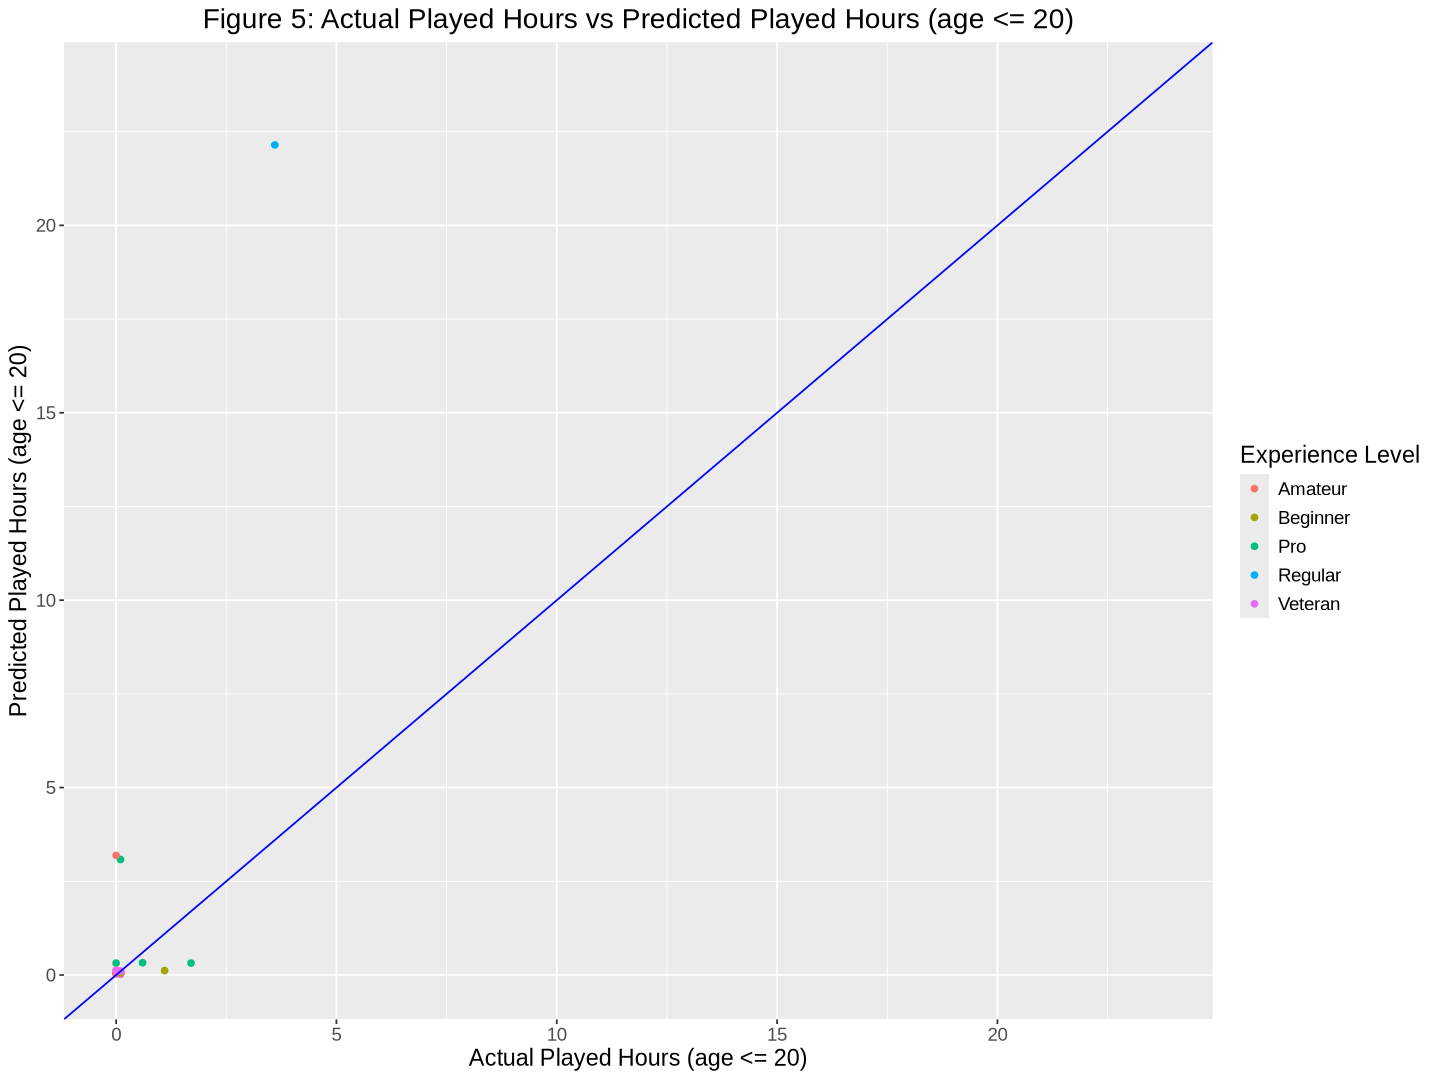

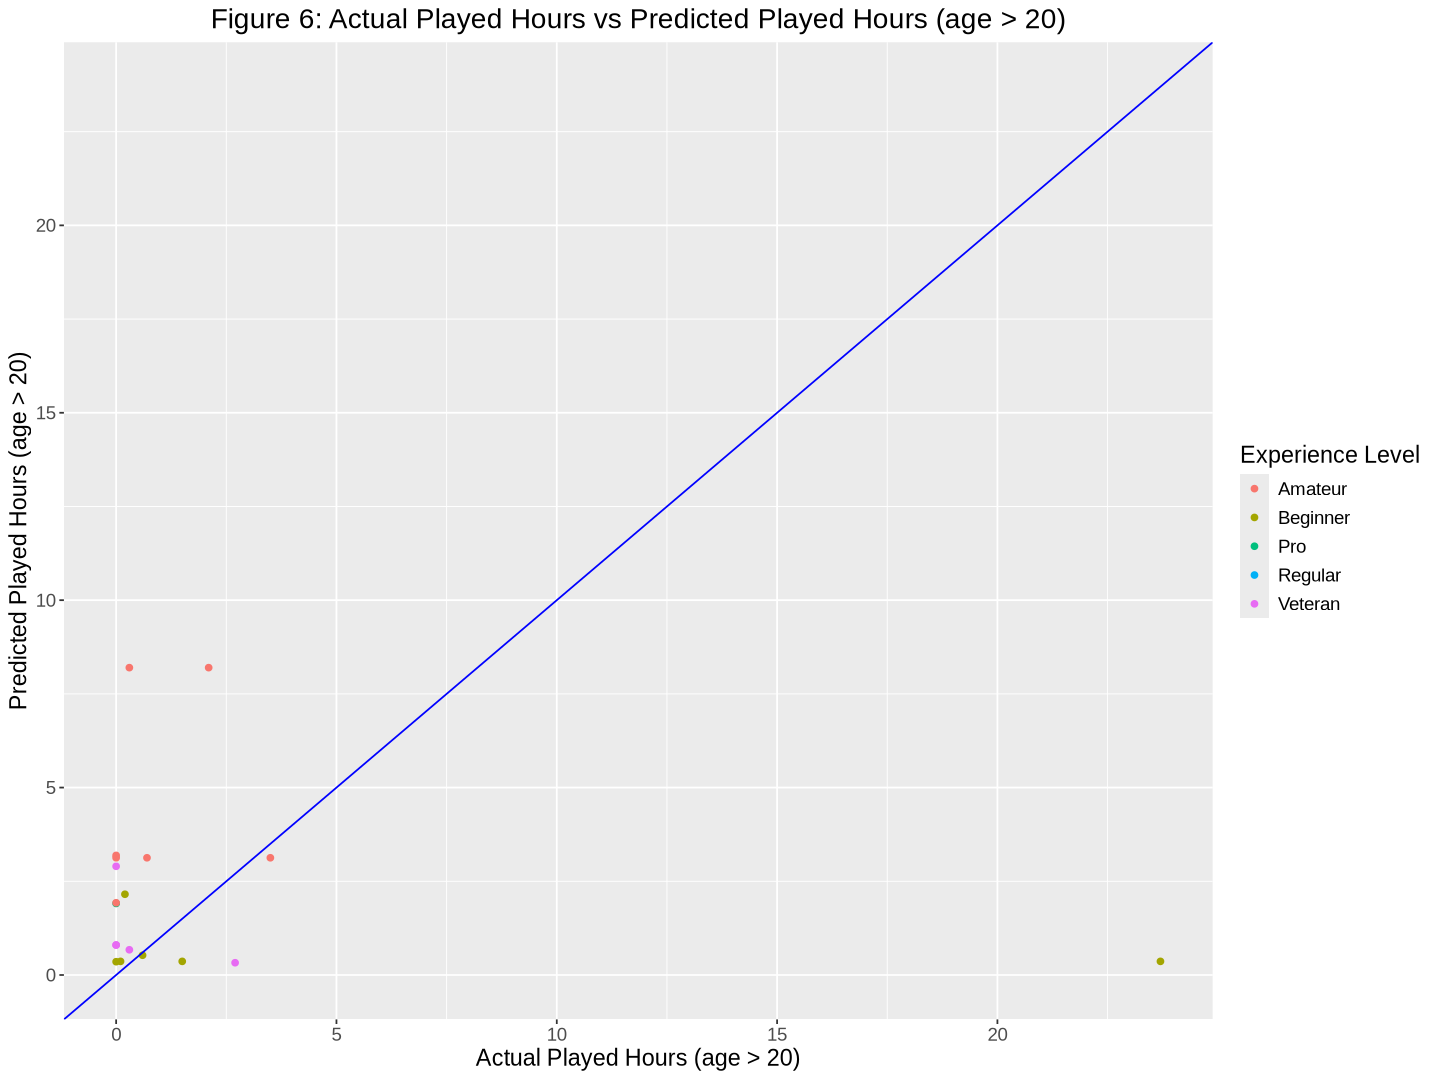

In [19]:
players_preds_3 <- players_preds |>
    mutate(experience_num = case_when(
                experience_num == 1 ~ "Beginner",
                experience_num == 2 ~ "Regular",
                experience_num == 3 ~ "Amateur",
                experience_num == 4 ~ "Veteran",
                experience_num == 5 ~ "Pro")) #to help with coloring the points based off of experience level

age_preds_small_20 <- players_preds_3 |>
     filter(Age <= 20) |>
    ggplot(aes(x = played_hours, y = .pred, color = experience_num)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "blue") +
    coord_cartesian(xlim = c(0, max_val), ylim = c(0, max_val)) +
    labs(
      x = "Actual Played Hours (age <= 20)",
      y = "Predicted Played Hours (age <= 20)",
      color = "Experience Level",
      title = "Figure 5: Actual Played Hours vs Predicted Played Hours (age <= 20)") +
  theme(text = element_text(size = 14),
  plot.title = element_text(hjust = 0.5))
age_preds_small_20

age_preds_big_20 <- players_preds_3 |>
     filter(Age > 20) |>
    ggplot(aes(x = played_hours, y = .pred, color = experience_num)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "blue") +
    coord_cartesian(xlim = c(0, max_val), ylim = c(0, max_val)) +
    labs(
      x = "Actual Played Hours (age > 20)",
      y = "Predicted Played Hours (age > 20)",
      color = "Experience Level",
      title = "Figure 6: Actual Played Hours vs Predicted Played Hours (age > 20)") +
    theme(text = element_text(size = 14),
    plot.title = element_text(hjust = 0.5))
age_preds_big_20

Then we will represent the relationship of experience and played_hours using a bar plot (like above). However, we will first have to wrangle our `experience_num` column back into its original categorical form so we will use the same encoding method to change it back, call this `exp_preds_2`. Then we will plot our data, call this `exp_prediction_plot_2`

experience_num,played_hours,.pred
<fct>,<dbl>,<dbl>
Beginner,3.4125000,0.537500
Regular,1.4454545,34.868595
Amateur,0.4928571,2.454545
Veteran,0.3090909,0.546281
Pro,0.4800000,1.190909


No summary function supplied, defaulting to `mean_se()`


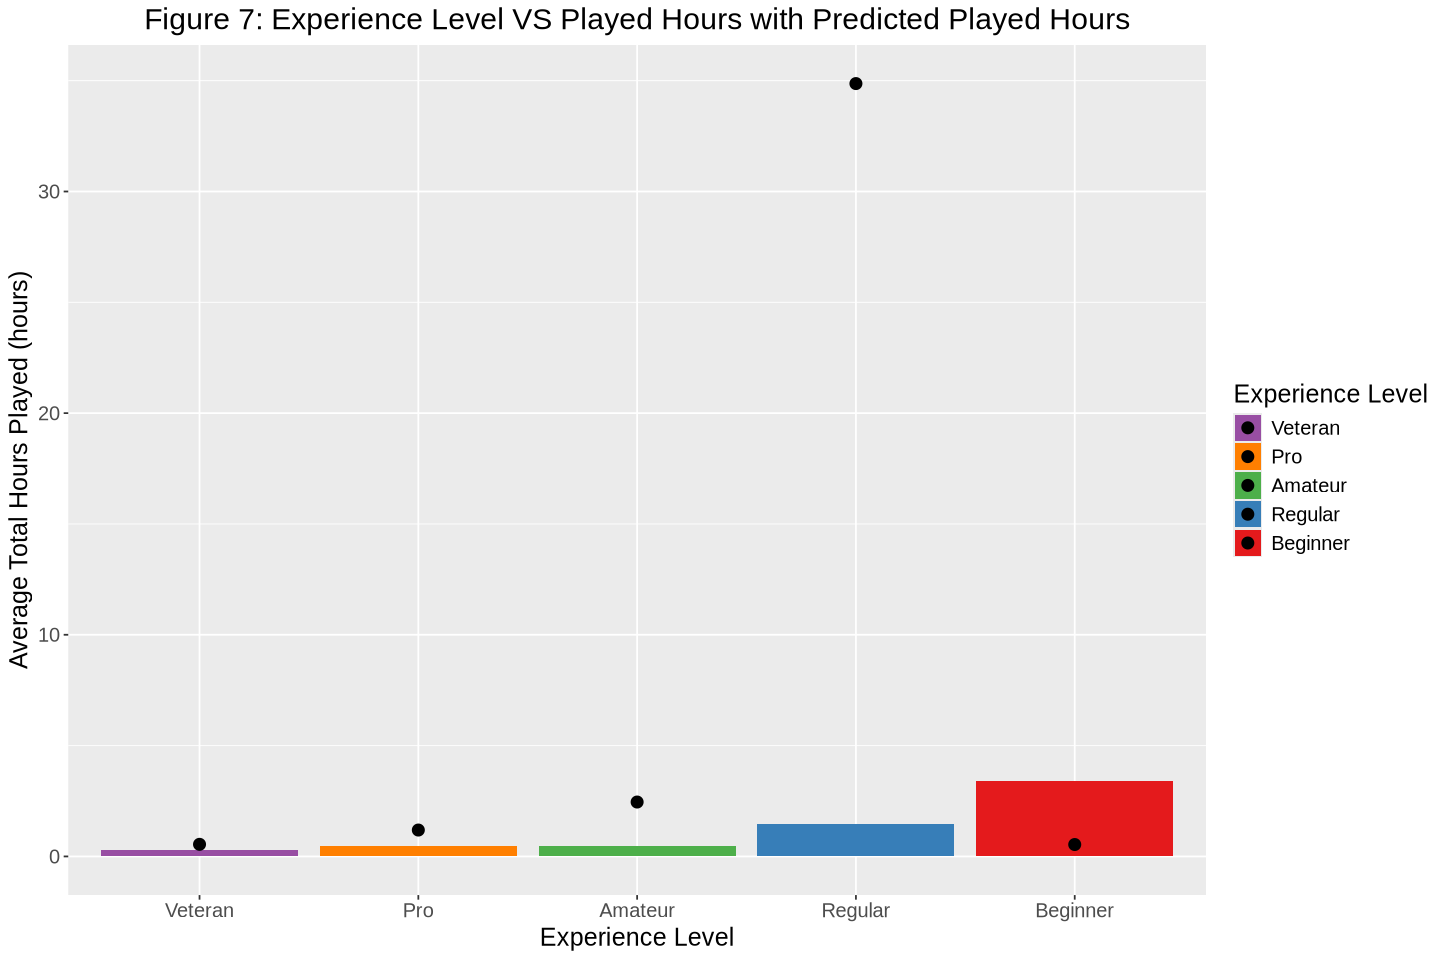

In [20]:
exp_preds_2 <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    group_by(experience_num) |>
     summarize(played_hours = mean(played_hours),
              .pred = mean(.pred)) |>
   mutate(experience_num = case_when(
                experience_num == 1 ~ "Beginner",
                experience_num == 2 ~ "Regular",
                experience_num == 3 ~ "Amateur",
                experience_num == 4 ~ "Veteran",
                experience_num == 5 ~ "Pro")) |>
    mutate(experience_num = fct_reorder(experience_num, played_hours)) #used to reorder the bars in terms of ascending order
exp_preds_2

options(repr.plot.width = 12, repr.plot.height = 8)

exp_prediction_plot_2 <- ggplot(exp_preds_2, aes(x = experience_num, y = played_hours, fill = experience_num)) +
    geom_bar(stat = "summary") +
    geom_point(aes(y = .pred), size = 3) +
    labs(title = "Figure 7: Experience Level VS Played Hours with Predicted Played Hours",
         x = "Experience Level", 
         y = "Average Total Hours Played (hours)",
        fill = "Experience Level") +
    scale_fill_manual(values = bar_colors) +
    theme(text = element_text(size = 15),
    plot.title = element_text(hjust = 0.5))
    
exp_prediction_plot_2

# Discussion:

From figure 4, we can see that majority of the points are being overfitted on the graph (higher then the normal distribution). In figure 5 we can see that more of the points are underfitted (lower then the normal distribution) but are closer to the line compared to figure 6 and majority of the experience levels (that we can clearly see on the graph since a lot of the points would be overlapped) fall in the "Pro" and "Veteran" experience level. Additionally, in figure 6 the points are a lot more scattered with more points being over the line (overfitted) and majority of the experience levels (that we can clearly see on the graph) fall in the "Beginner" and "Amateur" experience level. Lastly in figure 7 it is seen that the "Beginner" experience level had the highest average total play time in hours compared to the rest of the groups but the "Regular" experience level had the highest predicted average total play time in hours and the "Veteran" experience level having the closest predicted total average play time in hours compared to the actual total average play time in hours.

Comparing these results to figures 1 and 2 these results were overall partially expected since the dataset we were using is very small which would lead to the variability in the predictions of the data and the predictions not fully representing the dataset accordingly. We were surprised to see that our RMSPE was around 16.47 hours for each player which is a lot indicating that age and experience may not have as big of an impact on played_hours as we expected given the large percentage error. Based on figures 3 to 6 the model is overestimating the lower play times of the players and underestimating the longer play times of each player which is expected from the very high RMSPE. Even in figure 7 the "Regular" experience level has a really high predicted average total play time in hours even though the actual average total play time for the "Regular" experience level is very low. Moreover, from figures 3 to 6 it is clear that there is a very weak correlation between played hours and age as there is not a "set amount of hours played" for any age group, meaning a child could play 10 minutes or it could play 4 hours making Age as not a reliable explanatory variable for prediction. Other then the "Regular" experience level prediction, the other levels have slightly better predictions but they are still not good enough to see a strong correlation between the experience and played hours variables since the RMSPE is so high. Another potential reason why these predictions are off is because we are using KNN which could struggle if there are not enough points and could then easily conform to any outlier points skewing the predictions. Furthermore, in general there was a lot of players with 0 hours played which could have affected/skewed the predictions for each experience group especially if there was a combination of 0 hours played and a few really high number of hours played.

From above we can conclude that **experience and age cannot predict the played hours in the given dataset**. 

Many future questions that can be derived from our research revolve around player retention. Questions like "will adding a tutorial lead to more beginner-level player retention" or "can more structured or achievement based gameplay lead to longer player retention" are interesting questions that can be researched further. Taking a step back, researchers can ask questions about other variables and their impact on player retention such as "does playing with others impact hours played" or "how do differing schedules affect hours played". Moreover, further questions about improving the model and making it more precise such as adding even more predictors (having the specific start and end time from the sessions dataset), utilizing the experience varaible in a different way instead of just changing it into a numerical value, or choosing a better split of training and testing sets could change our results. However, the biggest difference is having more observations in the dataset. We believe that using a bigger dataset will help improve the precision of the model and make it more representative of all the data and produce more interpretable results to accurately answer the question of which type of players would contribute a large amount of data so that we can target those players in our recruiting efforts.

# References:

Bobbitt, Z. (2022, October 25). How to Create a Q-Q Plot in ggplot2 (With Example). Statology. https://www.statology.org/ggplot-q-q-plot/